In [136]:
import numpy as np
import pandas as pd
import optuna
import warnings

import seaborn as sns
import matplotlib as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearnex.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, auc, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error

import xgboost as xgb
from sklearn.model_selection import train_test_split 


# from utils import mapk


warnings.filterwarnings('ignore')

In [1]:
from utils import mapk

ImportError: cannot import name 'mapk' from 'utils' (D:\Programy\anaconda3\Lib\site-packages\utils\__init__.py)

In [110]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
from sklearn.preprocessing import LabelEncoder
# encode the target calss into numeric
label = LabelEncoder()
train['prognosis'] =label.fit_transform(train['prognosis'])

In [5]:
train.head(3)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,3


In [7]:
y = train['prognosis']
X = train.drop('prognosis',axis=1)

In [8]:
y.unique()

array([ 3,  7, 10,  6,  8,  4,  0,  5,  1,  9,  2])

In [42]:
# ohe = OrdinalEncoder()
# y = ohe.fit_transform(train[['prognosis']])

In [9]:
# from sklearn.preprocessing import LabelEncoder
# # encode the target calss into numeric
# label = LabelEncoder()
# y =label.fit_transform(train['prognosis'])

# train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
X_train.shape

(565, 65)

In [11]:
X_test.shape

(142, 65)

# XGB

In [91]:
XGB_model = xgb.XGBRegressor(random_state=42)

In [96]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [97]:
XGB_pred = XGB_model.predict(X_test)

In [104]:
print(f'Train Score:{XGB_model.score(X_train, y_train)}')
print(f'Valid Score:{XGB_model.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, XGB_pred)}')

Train Score:0.999949002476155
Valid Score:0.15618732059960394
MAE: 2.3243008543837798


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [32]:
mse=mean_squared_error(y_test, XGB_pred)
print(np.sqrt(mse))

3.0983587307412805


In [62]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [ ]:
# cross-val

In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGB_model, X, y, scoring="neg_mean_squared_error", cv=5)

display_scores(np.sqrt(-scores))
print(f'RFR- Score {XGB_model.score(X,y)}')

Scores: [3.05934272 3.10445489 3.50067918 2.86057667 3.12576751]
Mean: 3.130
Std: 0.208
RFR- Score 0.7488023794793321


In [ ]:
# cross-val

In [101]:
XGB_model_2 = xgb.XGBRegressor(random_state=42)
XGB_model_2.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [102]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold
skf = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=42)

RFR_cv = cross_val_score(XGB_model_2, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)

# # ROC_AUC
print(f"ROC-AUC- The 10-fold average of ROC-AUC score of the Logistic Regression model is {RFR_cv.mean()}")
print(f"ROC-AUC- The 10-fold std of ROC-AUC score of the Logistic Regression model is {RFR_cv.std()}")
# MAE
RFR_mae = cross_val_score(XGB_model_2, X, y, cv=skf, scoring='neg_mean_absolute_error', n_jobs=-1)
print(f"MAE -The 10-fold average of MAE score of the Logistic Regression model is {RFR_mae.mean()}")
# MSE
RFR_mse = cross_val_score(XGB_model_2, X, y, cv=skf, scoring='neg_mean_squared_log_error', n_jobs=-1)
print(f"MSE -The 10-fold average of MSE score of the Logistic Regression model is {RFR_mse.mean()}")

# # SCORE
# RFR_2.fit(X, y)
print(f'RFR- Score {XGB_model_2.score(X,y)}')

ROC-AUC- The 10-fold average of ROC-AUC score of the Logistic Regression model is nan
ROC-AUC- The 10-fold std of ROC-AUC score of the Logistic Regression model is nan
MAE -The 10-fold average of MAE score of the Logistic Regression model is -2.4028966664138918
MSE -The 10-fold average of MSE score of the Logistic Regression model is nan
RFR- Score 0.9996706037322938


In [180]:
s = np.array(y)
ss = s.reshape(-1, 1)
ss

array([[ 3],
       [ 7],
       [ 3],
       [10],
       [ 6],
       [ 3],
       [ 8],
       [ 7],
       [ 4],
       [ 0],
       [ 5],
       [10],
       [ 1],
       [ 4],
       [ 0],
       [ 4],
       [10],
       [ 9],
       [ 7],
       [ 3],
       [ 0],
       [ 0],
       [ 8],
       [10],
       [ 3],
       [ 2],
       [ 9],
       [ 5],
       [ 6],
       [ 0],
       [ 2],
       [ 7],
       [ 8],
       [ 7],
       [10],
       [ 0],
       [ 7],
       [ 6],
       [ 2],
       [ 8],
       [10],
       [10],
       [ 1],
       [ 1],
       [10],
       [ 0],
       [ 9],
       [ 0],
       [ 3],
       [ 9],
       [ 7],
       [ 0],
       [ 2],
       [ 8],
       [ 3],
       [ 2],
       [ 5],
       [ 1],
       [ 4],
       [10],
       [ 9],
       [ 9],
       [ 8],
       [ 8],
       [ 9],
       [ 3],
       [ 4],
       [ 8],
       [ 7],
       [ 7],
       [ 7],
       [10],
       [ 6],
       [ 5],
       [ 2],
       [ 1],
       [10],

In [104]:
RFC_model2 = RandomForestClassifier(oob_score=True, random_state=42)

In [105]:
RFC_model2.fit(X, y)

RandomForestClassifier(oob_score=True, random_state=42)

In [106]:
pred_tr = RFC_model2.oob_decision_function_

In [181]:
pred_tr

array([[0.        , 0.        , 0.11363636, ..., 0.15909091, 0.04545455,
        0.15909091],
       [0.51724138, 0.10344828, 0.06896552, ..., 0.03448276, 0.03448276,
        0.        ],
       [0.        , 0.        , 0.02325581, ..., 0.1627907 , 0.        ,
        0.04651163],
       ...,
       [0.02564103, 0.05128205, 0.1025641 , ..., 0.20512821, 0.15384615,
        0.07692308],
       [0.02272727, 0.09090909, 0.11363636, ..., 0.20454545, 0.09090909,
        0.04545455],
       [0.        , 0.17647059, 0.        , ..., 0.05882353, 0.02941176,
        0.02941176]])

In [127]:
sorted_prediction_ids = np.argsort(-pred_tr, axis=1)
top_3_prediction_ids = sorted_prediction_ids[:,:3]
# score = mapk(y.reshape(-1, 1), top_3_prediction_ids, k=3)

In [128]:
sorted_prediction_ids

array([[ 8, 10,  3, ...,  9,  0,  1],
       [ 0,  1,  7, ...,  9,  3, 10],
       [ 3,  5,  8, ...,  0,  1,  9],
       ...,
       [ 8,  9,  5, ...,  1,  0,  7],
       [ 3,  8,  2, ..., 10,  0,  4],
       [ 7,  1,  6, ...,  0,  2,  4]], dtype=int64)

In [129]:
top_3_prediction_ids

array([[ 8, 10,  3],
       [ 0,  1,  7],
       [ 3,  5,  8],
       ...,
       [ 8,  9,  5],
       [ 3,  8,  2],
       [ 7,  1,  6]], dtype=int64)

In [130]:
z = top_3_prediction_ids.reshape(-1, 1)
z

array([[ 8],
       [10],
       [ 3],
       ...,
       [ 7],
       [ 1],
       [ 6]], dtype=int64)

In [131]:
y

0       3
1       7
2       3
3      10
4       6
       ..
702     5
703     4
704    10
705     5
706     7
Name: prognosis, Length: 707, dtype: int32

# RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_mutual_info_score

In [100]:
RFC_model = RandomForestClassifier(random_state=42)

In [57]:
RFC_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
# Test data

In [58]:
RFC_pred = RFC_model.predict(X_test)

In [35]:
RFC_pred = RFC_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, RFC_pred)}')
print("Training Accuracy:", accuracy_score(y_test, RFC_pred))
print("Adjusted_mutual_info_score:", adjusted_mutual_info_score(y_test, RFC_pred))

MAE: 2.619718309859155
Training Accuracy: 0.30985915492957744
Adjusted_mutual_info_score: 0.16499630896788467


In [36]:
from sklearn.metrics import matthews_corrcoef
print('Valid MCC matthews_corrcoef score:', matthews_corrcoef(y_test ,RFC_pred))

Valid MCC matthews_corrcoef score: 0.2418830838656464


In [42]:
RFC_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [59]:
cv_score = cross_val_score(RFC_model, X_train, y_train, cv=5)
mean_cv_accuracy = cv_score.mean()
mean_cv_accuracy

0.3026548672566372

In [13]:
import optuna

In [121]:
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 200, 1000, log=True)
    max_depth = trial.suggest_int("max_depth", 5, 20, log=True)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    max_samples = trial.suggest_float('max_samples', 0.2, 0.99)

    # Create and fit random forest model
    model = RandomForestClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_samples=max_samples,
        bootstrap=True,
        verbose=0,
        oob_score=True,
        random_state=42,
        n_jobs=2
    )
    model.fit(X_train, y_train)

#     Make predictions and calculate RMSE
#     y_pred = model.predict(X_test)
# #     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mae = mean_absolute_error(y_test, y_pred)
# #     r2 = r2_score(y_test, y_pred)
# #     a = accuracy_score(y_test, y_pred)
#     return mae

#     pred_tr = model.oob_decision_function_
#     sorted_prediction_ids = np.argsort(-pred_tr, axis=1)
#     top_3_prediction_ids = sorted_prediction_ids[:,:3]
#     score = mapk(y.reshape(-1, 1), top_3_prediction_ids, k=3)    
#     return score

#     pred_train = model.oob_prediction_  REGRESSOr
    pred_train = model.oob_decision_function_
    score = mean_squared_error(y_train, pred_train, squared=False)
    return score


#     cv_score = cross_val_score(model, X_train, y_train, cv=5)
#     mean_cv_accuracy = cv_score.mean()
#     return mean_cv_accuracy

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create study object
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="minimize", sampler=sampler)
# Run optimization process
study.optimize(objective, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[W 2024-10-03 12:03:43,947] Trial 0 failed with parameters: {'n_estimators': 365, 'max_depth': 19, 'max_features': 0.7587945476302645, 'min_samples_split': 31, 'min_samples_leaf': 4, 'max_samples': 0.32323567106560014} because of the following error: ValueError('y_true and y_pred have different number of output (1!=11)').
Traceback (most recent call last):
  File "D:\Programy\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\adams\AppData\Local\Temp\ipykernel_11380\1193393443.py", line 42, in objective
    score = mean_squared_error(y_train, pred_train, squared=False)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Programy\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "D:\Programy\anaconda3\Lib\site-packages\sklearn\metrics\_regres

ValueError: y_true and y_pred have different number of output (1!=11)

In [118]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[W 2024-10-03 11:48:32,199] Trial 0 failed with parameters: {'n_estimators': 365, 'max_depth': 19, 'max_features': 0.7587945476302645, 'min_samples_split': 31, 'min_samples_leaf': 4, 'max_samples': 0.32323567106560014} because of the following error: AttributeError("module 'utils' has no attribute 'mapk'").
Traceback (most recent call last):
  File "D:\Programy\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\adams\AppData\Local\Temp\ipykernel_11380\1952289490.py", line 37, in objective
    score = ut.mapk(y.reshape(-1, 1), top_3_prediction_ids, k=3)
        ^^^^^^^
AttributeError: module 'utils' has no attribute 'mapk'
[W 2024-10-03 11:48:32,199] Trial 0 failed with value None.


AttributeError: module 'utils' has no attribute 'mapk'

In [60]:
study = optuna.create_study()
study.optimize(objective, n_trials=5, show_progress_bar=True)

  0%|          | 0/5 [00:00<?, ?it/s]

In [61]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)

Best trial: FrozenTrial(number=0, state=1, values=[0.23893805309734512], datetime_start=datetime.datetime(2024, 10, 3, 10, 54, 3, 948217), datetime_complete=datetime.datetime(2024, 10, 3, 10, 54, 5, 981629), params={'n_estimators': 228, 'max_depth': 7, 'max_features': 0.8178540658854897, 'min_samples_split': 10, 'min_samples_leaf': 25, 'max_samples': 0.32268350463391154}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=True, low=200, step=1), 'max_depth': IntDistribution(high=20, log=True, low=5, step=1), 'max_features': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 'min_samples_split': IntDistribution(high=50, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=25, log=False, low=1, step=1), 'max_samples': FloatDistribution(high=0.99, log=False, low=0.2, step=None)}, trial_id=0, value=None)


In [93]:
print("Best hyperparameters:", study.best_params)

Best hyperparameters: {'n_estimators': 988, 'max_depth': 14, 'max_features': 0.2904845133901127, 'min_samples_split': 13, 'min_samples_leaf': 12, 'max_samples': 0.9041261373912746}


In [ ]:
# Best hyperparameters: {'n_estimators': 128, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 10}

In [22]:
study.best_params

{'n_estimators': 128,
 'max_depth': 9,
 'min_samples_split': 3,
 'min_samples_leaf': 10}

In [34]:
# Import optuna.visualization
import optuna.visualization as vis

# Plot optimization history
vis.plot_optimization_history(study)

# Plot parameter importance
vis.plot_param_importances(study)

# Plot slice plot
vis.plot_slice(study, params=["n_estimators", "max_depth"])

# Plot contour plot
vis.plot_contour(study, params=["min_samples_split", "min_samples_leaf"])

# Plot parallel_coordinate
vis.plot_parallel_coordinate(study)

# RandomForestRegresor

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay,  log_loss, f1_score, r2_score

In [133]:
RFR_model = RandomForestRegressor(random_state=42)

In [134]:
RFR=RFR_model.fit(X_train, y_train)

In [135]:
RFR_predict = RFR.predict(X_test)

In [137]:
print(f'Train Score:{RFR_model.score(X_train, y_train)}')
print(f'Valid Score:{RFR_model.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, RFR_predict)}')

Train Score:0.893264255252321
Valid Score:0.2056859531669708
MAE: 2.3207746478873235


In [138]:
kf = KFold(n_splits=5)

In [142]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 150, log=True)
    max_depth = trial.suggest_int("max_depth", 5, 20, log=True)
    max_features = trial.suggest_float('max_features', 0.15, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 28)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)
    max_samples = trial.suggest_float('max_samples', 0.3, 0.9)

    model = RandomForestRegressor(max_depth=max_depth,
                                  n_estimators=n_estimators,
                                  max_features=max_features,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_samples=max_samples,
                                  bootstrap=True,
                                  n_jobs=2,
                                  verbose=0,
                                  random_state=42)
    
    cvs = cross_val_score(model,
                          cv=kf,
                          X=X_train,
                          y=y_train,
                          scoring='neg_root_mean_squared_error')
    score = cvs.mean()
    return score

In [146]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [147]:
print("Best hyperparameters:", study.best_params)

Best hyperparameters: {'n_estimators': 150, 'max_depth': 11, 'max_features': 0.32010011491238954, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_samples': 0.7607392194343146}


In [148]:
model = RandomForestRegressor(**study.best_params, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=0.32010011491238954,
                      max_samples=0.7607392194343146, min_samples_split=14,
                      n_estimators=150, random_state=42)

In [149]:
pred_test = model.predict(test)

In [116]:
RFR_model_2 = RandomForestRegressor(random_state=42)
RFR_2 = RFR_model_2.fit(X, y)

In [ ]:
# cross-val

In [131]:
y

array([ 3,  7,  3, 10,  6,  3,  8,  7,  4,  0,  5, 10,  1,  4,  0,  4, 10,
        9,  7,  3,  0,  0,  8, 10,  3,  2,  9,  5,  6,  0,  2,  7,  8,  7,
       10,  0,  7,  6,  2,  8, 10, 10,  1,  1, 10,  0,  9,  0,  3,  9,  7,
        0,  2,  8,  3,  2,  5,  1,  4, 10,  9,  9,  8,  8,  9,  3,  4,  8,
        7,  7,  7, 10,  6,  5,  2,  1, 10,  8,  2,  3,  9,  8,  7,  7,  2,
        5, 10,  5,  6,  5,  0,  8,  3,  0,  2,  7,  1,  2,  1,  1,  7, 10,
        5,  3,  4,  8,  9,  9,  2,  5,  0,  2, 10, 10,  7,  4,  2,  3,  0,
        4,  5,  6,  2,  1,  1,  8,  8,  5,  3,  1,  8,  4,  4,  1,  5,  2,
        8,  2,  0,  0,  4,  1, 10,  1,  6,  5,  1,  8,  8,  8,  7,  1,  6,
        4,  0,  8,  2,  4,  5,  0,  6,  8,  2,  1,  3,  8,  6,  0, 10,  8,
        0,  8,  2,  5,  9,  8,  4,  5,  9,  2,  6,  9,  6,  1,  3,  3,  7,
        6,  0,  1,  8,  2,  3,  0,  2,  0,  4,  6,  7,  4,  2,  7,  2,  9,
        8,  2,  6,  1,  2,  2, 10,  3,  5,  9,  6,  7,  7,  2,  3,  2,  2,
        1,  8,  5,  8,  9

In [136]:
cv_scores = cross_val_score(RFR, X, y, 
                            cv=5,
                            scoring='accuracy')

print("Accuracy scores:\n", scores)
print("Cross-validation accuracy: %f" % cv_scores.mean())

TypeError: cross_val_score() got an unexpected keyword argument 'random_state'

In [137]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold
skf = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=42)

RFR_cv = cross_val_score(RFR, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)

# # ROC_AUC

print(f"ROC-AUC- The 10-fold average of ROC-AUC score of the Logistic Regression model is {RFR_cv.mean()}")
print(f"ROC-AUC- The 10-fold std of ROC-AUC score of the Logistic Regression model is {RFR_cv.std()}")
# MAE
RFR_mae = cross_val_score(RFR, X, y, cv=skf, scoring='neg_mean_absolute_error', n_jobs=-1)
print(f"MAE -The 10-fold average of MAE score of the Logistic Regression model is {RFR_mae.mean()}")
# MSE
RFR_mse = cross_val_score(RFR, X, y, cv=skf, scoring='neg_mean_squared_log_error', n_jobs=-1)
print(f"MSE -The 10-fold average of MSE score of the Logistic Regression model is {RFR_mse.mean()}")

# # SCORE
RFR.fit(X, y)
print(f'RFR- Score {RFR_2.score(X,y)}')

ROC-AUC- The 10-fold average of ROC-AUC score of the Logistic Regression model is nan
ROC-AUC- The 10-fold std of ROC-AUC score of the Logistic Regression model is nan
MAE -The 10-fold average of MAE score of the Logistic Regression model is -2.3409699483110953
MSE -The 10-fold average of MSE score of the Logistic Regression model is -0.3432977407214916
RFR- Score 0.892670743909153


# RandomizedSearchCV

In [43]:
RFC_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# clf = RandomizedSearchCV(RFC_model,  random_state=42)
# search = clf.fit(X_train)
# search.best_params_

In [ ]:
# random_param_1 = {
#     'max_depth': range(2,10),
#     'learning_rate': np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000),
#     'n_estimators': range(100, 1000, 50),
#     'gamma': np.linspace(0, 0.4, 6),
#     'min_child_weight': range(1,100,5),
#     'subsample': np.linspace(0.5, 1, 101),
#     'colsample_bytree': np.linspace(0.6, 1, 11),
#     'colsample_bylevel': np.linspace(0.6, 1, 11),
#     'reg_alpha': np.linspace(0, 1),
#     'reg_lambda': np.linspace(0, 1),
#     'tree_method': ['gpu_hist']
# }

In [44]:
random_param_1 = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 1000]}

In [168]:
grzyb_param = {'bootstrap': [True],
               'max_depth': [5, 20],
               'max_features': [0.1, 1.0],
               'min_samples_leaf': [1, 25],
               'min_samples_split': [2, 50],
               'n_estimators': [200, 1000],
               'max_samples': [0.2, 0.99]}

In [54]:
# grzybo = {n_estimators = trial.suggest_int("n_estimators", 200, 1000, log=True)
#                 max_depth = trial.suggest_int("max_depth", 5, 20, log=True)
#                 max_features = trial.suggest_float('max_features', 0.1, 1.0)
#                 min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
#                 min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
#                 max_samples = trial.suggest_float('max_samples', 0.2, 0.99)}

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2622056627.py, line 1)

In [169]:
random_search_grybo = RandomizedSearchCV(estimator=RFC_model,
                                 param_distributions=grzyb_param,
                                 n_iter=4*4*4*2,
                                 verbose=0,
                                 random_state=42,
                                 n_jobs=3,      
                                 scoring='roc_auc' )

In [56]:
random_search = RandomizedSearchCV(estimator=RFC_model
                                 , param_distributions=random_param_1
                                 , n_iter=4*4*4*2
                                 , scoring='roc_auc' )

In [171]:
random_search_grybo.fit(X=X_train, y=y_train)
 
best_parameters = random_search_grybo.best_params_  
best_parameters 

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.2,
 'max_features': 0.1,
 'max_depth': 5,
 'bootstrap': True}

In [174]:
best_parameters= {'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.2,
 'max_features': 0.1,
 'max_depth': 5,
 'bootstrap': True}

In [64]:
random_param_1__AFTER ={'n_estimators': 130,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

# MAE: 2.676056338028169
# Training Accuracy: 0.3380281690140845
# Adjusted_mutual_info_score: 0.16106294842911503

In [67]:
grzyb_param_AFTER ={'n_estimators': 130,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 0.1,
 'max_depth': 5,
  'bootstrap': True}

# MAE: 2.676056338028169
# Training Accuracy: 0.3380281690140845
# Adjusted_mutual_info_score: 0.16106294842911503

In [175]:
model = RandomForestClassifier(**best_parameters, random_state=42)
model.fit(X_train, y_train)

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [94]:
# model = xgb.XGBClassifier(**best_parameters)
model = RandomForestClassifier(**study.best_params, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, max_features=0.2904845133901127,
                       max_samples=0.9041261373912746, min_samples_leaf=12,
                       min_samples_split=13, n_estimators=988, random_state=42)

In [95]:
pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, pred)}')
print("Training Accuracy:", accuracy_score(y_test, pred))
print("Adjusted_mutual_info_score:", adjusted_mutual_info_score(y_test, pred))

MAE: 2.387323943661972
Training Accuracy: 0.33098591549295775
Adjusted_mutual_info_score: 0.1800268415816041


In [96]:
pred_test = model.predict(test)

In [150]:
pred_test

array([5.44103721, 3.66855987, 5.41497756, 5.51379453, 5.31361248,
       6.37989843, 4.92643897, 3.52448307, 5.95583984, 5.86836916,
       5.1821534 , 5.4082298 , 4.81953403, 1.83280652, 5.77057347,
       6.01579023, 6.08797921, 5.50009607, 2.78595851, 5.77738109,
       5.56997721, 6.55833873, 4.5759417 , 4.27402934, 4.1298467 ,
       2.34964175, 4.08311799, 5.91535534, 5.84960548, 4.58139577,
       5.81074731, 5.78367495, 4.9168322 , 5.06313804, 4.87787806,
       5.22858815, 5.67413479, 5.67426092, 4.5393334 , 5.48906456,
       5.38039272, 1.27223172, 5.61347184, 6.88238995, 1.10772696,
       5.46793106, 1.5558094 , 4.85161453, 6.16693642, 5.96924808,
       5.49093622, 3.75336375, 5.05975463, 6.34734877, 5.3603922 ,
       4.74153983, 4.48982358, 1.12961926, 4.61756793, 4.10094976,
       5.57910977, 5.68682806, 5.141431  , 2.95334069, 5.35728567,
       5.00677432, 5.58809696, 5.40220691, 4.73521542, 5.44459087,
       4.82777647, 5.72559131, 4.56250676, 5.41560293, 5.43092

In [39]:
# x = label.inverse_transform(pred_test)
# x

array(['Chikungunya', 'Chikungunya', 'West_Nile_fever',
       'Japanese_encephalitis', 'West_Nile_fever', 'Zika', 'Malaria',
       'Chikungunya', 'Yellow_Fever', 'West_Nile_fever', 'Chikungunya',
       'Rift_Valley_fever', 'Dengue', 'Chikungunya', 'West_Nile_fever',
       'Japanese_encephalitis', 'West_Nile_fever', 'Tungiasis',
       'Chikungunya', 'West_Nile_fever', 'Lyme_disease', 'Yellow_Fever',
       'Lyme_disease', 'Lyme_disease', 'Chikungunya', 'Chikungunya',
       'Chikungunya', 'Yellow_Fever', 'West_Nile_fever', 'Lyme_disease',
       'West_Nile_fever', 'Tungiasis', 'Lyme_disease', 'Lyme_disease',
       'Lyme_disease', 'West_Nile_fever', 'Zika', 'Zika', 'Tungiasis',
       'West_Nile_fever', 'West_Nile_fever', 'Chikungunya',
       'Yellow_Fever', 'Zika', 'Chikungunya', 'Rift_Valley_fever',
       'Chikungunya', 'Lyme_disease', 'Zika', 'Tungiasis',
       'Rift_Valley_fever', 'Chikungunya', 'Tungiasis', 'Yellow_Fever',
       'Rift_Valley_fever', 'Lyme_disease', 'Chikun

In [159]:
pred_test= pred_test.round()
pred_test= zz.astype('int')
pred_test

array([5, 4, 5, 6, 5, 6, 5, 4, 6, 6, 5, 5, 5, 2, 6, 6, 6, 6, 3, 6, 6, 7,
       5, 4, 4, 2, 4, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 1, 6, 7,
       1, 5, 2, 5, 6, 6, 5, 4, 5, 6, 5, 5, 4, 1, 5, 4, 6, 6, 5, 3, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 2, 5, 5, 6, 5, 6, 6, 6, 5, 5, 4, 5, 2,
       5, 5, 5, 3, 6, 6, 5, 2, 5, 5, 5, 6, 5, 5, 5, 5, 6, 2, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 2, 5, 5, 6, 2, 5, 5, 5, 6, 6, 5, 2, 5, 5, 4,
       5, 4, 6, 5, 6, 5, 5, 2, 5, 6, 5, 5, 6, 3, 5, 5, 5, 5, 3, 5, 5, 6,
       3, 5, 4, 2, 6, 2, 5, 1, 6, 4, 2, 5, 5, 1, 5, 6, 6, 6, 5, 6, 6, 5,
       2, 5, 5, 5, 3, 5, 2, 5, 5, 5, 5, 1, 2, 6, 5, 5, 5, 7, 5, 6, 6, 4,
       6, 4, 5, 4, 2, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 1, 3, 3, 6, 5, 4,
       6, 6, 3, 5, 4, 6, 5, 4, 1, 5, 5, 6, 6, 5, 5, 3, 6, 5, 4, 5, 6, 3,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 1, 5, 6, 3, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 4, 5, 2, 5, 5, 5, 6,
       6, 5, 5, 4, 5, 6, 6, 5, 5, 6, 6, 6, 6, 4, 5,

In [160]:
submission = pd.DataFrame({
    'id': test['id'],
    'prognosis': label.inverse_transform(pred_test)
})
submission

,id,prognosis
0,707,Plague
1,708,Malaria
2,709,Plague
3,710,Rift_Valley_fever
4,711,Plague
...,...,...
298,1005,Rift_Valley_fever
299,1006,Malaria
300,1007,Plague
301,1008,Plague


In [161]:
submission.to_csv('RFC_07_Reg.csv', index=False)

In [70]:
sample = pd.read_csv('sample_submission.csv')

In [72]:
sample.head()

,id,prognosis
0,707,Dengue Zika Japanese_encephalitis
1,708,Dengue Zika Japanese_encephalitis
2,709,Dengue Zika Japanese_encephalitis
3,710,Dengue Zika Japanese_encephalitis
4,711,Dengue Zika Japanese_encephalitis


In [75]:
test.head(3)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X.skew()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,4.874705e+02,2769.818059,2846.323663,2817.978783,2773.633238,2778.520936,2846.323663,2876.849009,2773.633238,3247.458079,3213.978749,3363.39137,3509.13787,3813.966399,4876.835924,3408.159071,3198.075265,3857.024661,3431.889555,9034.390491,8122.712411,5307.579604,5694.367022,3628.865143,3042.563557,3247.458079,3385.3431,5147.757561,4055.815403,3153.423327,3813.966399,1597.801215,3456.5891,2850.991871,2846.323663,3100.264928,2841.815698,2780.041129,2778.520936,2888.432799,3482.317007,2.094818e+02,1.371464e+02,1.287001e+02,1.295455e+02,1.309664e+02,1.408448e+02,1.337203e+02,1.289704e+02,1.384251e+02,2.880421e+02,1.602360e+02,1.897159e+02,1.508067e+02,2.000639e+02,2.469690e+02,4.889787e+02,3.888203e+02,4.581979e+02,4.353766e+02,2.344222e+02,2.567452e+02,2.737577e+02,7.469015e+02,7.612328e+02
1,1.403218e-106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.247983e-46,1.655916e-30,1.130121e-28,7.405475e-29,3.639251e-29,2.605816e-31,9.183277e-30,9.872531e-29,8.736999e-31,2.834400e-63,1.603981e-35,6.363728e-42,1.789500e-33,3.603096e-44,2.351652e-54,6.601344e-107,3.704608e-85,3.188523e-100,2.878573e-95,1.246990e-51,1.772134e-56,3.583111e-60,6.492461e-163,5.016499e-166


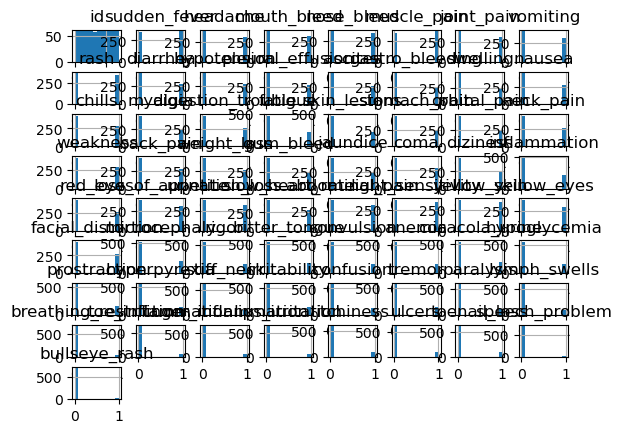

In [34]:
X.hist(bins=12) # histogram dla wszystkich zmiennych 
from scipy import stats # test na normalność rozkładu 
X.select_dtypes([float, int]).apply(stats.normaltest) # p-value to wartość

In [54]:
def objective(trial):    
    n_estimators = trial.suggest_int("n_estimators", 200, 1000, log=True)
    max_depth = trial.suggest_int("max_depth", 5, 20, log=True)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    max_samples = trial.suggest_float('max_samples', 0.2, 0.99)
    model = RandomForestClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_samples=max_samples,
        bootstrap=True,
        verbose=0,
        oob_score=True,
        random_state=42,
        n_jobs=3
    )
    model.fit(X, y)
    pred_train = model.oob_prediction_
    score = mean_squared_error(y, pred_train, squared=False)
    return score

In [45]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

[W 2024-10-02 11:56:30,047] Trial 0 failed with parameters: {'n_estimators': 365, 'max_depth': 19, 'max_features': 0.7587945476302645, 'min_samples_split': 31, 'min_samples_leaf': 4, 'max_samples': 0.32323567106560014} because of the following error: ValueError("node array from the pickle has an incompatible dtype:\n- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}\n- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]").
Traceback (most recent call last):
  File "D:\Programy\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [55]:
sampler=optuna.samplers.TPESampler(seed=42) # musimy zadbać o powstarzalność wyników pomiędzy eksperymentami
study = optuna.create_study(direction="minimize", sampler=sampler)
optuna.logging.set_verbosity(optuna.logging.WARNING)


In [58]:
study.optimize(objective, n_trials=30, show_progress_bar=True)

  0%|          | 0/30 [00:00<?, ?it/s]

[W 2024-10-02 12:11:32,367] Trial 1 failed with parameters: {'n_estimators': 219, 'max_depth': 17, 'max_features': 0.6410035105688879, 'min_samples_split': 36, 'min_samples_leaf': 1, 'max_samples': 0.9662287832079757} because of the following error: ValueError("node array from the pickle has an incompatible dtype:\n- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}\n- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]").
Traceback (most recent call last):
  File "D:\Programy\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File 

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]